# Sales Analysis

### Importing Libraries necessary

In [105]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt


### 1. merge datasets

In [44]:
#merged files

joined_files = os.path.join("./Sales_Data","Sales_*.csv")

thelist = glob.glob(joined_files)

#the dataset

df = pd.concat(map(pd.read_csv,thelist), ignore_index=True)


In [45]:
#see if everything is correct

df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


In [23]:
#saving the merged data

df.to_csv("all_data_sales.csv", index=False)

    Cleaning the data

In [50]:
nan_locations = df.isnull()

nan_count = nan_locations.sum()

#displaying how many missing values 
print(nan_count)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
Month               545
dtype: int64


In [74]:
#getting rid of NaN values
df = df.dropna()

In [75]:
#checking again
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

### 2. EDA
#### Best month of sales

    Creating "Month" column

In [76]:
# create a "month" column
df["Month"] = df["Order Date"].str[:2]

In [78]:
#converting to int64 
df["Month"]= df["Month"].astype('int64')

ValueError: invalid literal for int() with base 10: 'Or'

In [82]:
#fixing the issue above 
temp_df = df[df['Order Date'].str[:2] == 'Or']

temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


>*For some reason it's giving me 'Or' when I slice the 'Order Date', to fix it. I will update the dataset by the columns that don't include this error*

In [83]:
df = df[df['Order Date'].str[:2] != 'Or']

In [84]:
#reconverting
df["Month"] = df["Month"].astype('int64')

In [85]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


    Creating "Sales" column 

In [87]:
#first, we need to convert the columns to their correct data types

df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])


In [88]:
#creating the column

df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [89]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


    Finding the best month for sales 

In [104]:
best_month = df.groupby("Month").sum()
best_month= best_month.iloc[:, -1:]
best_month

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


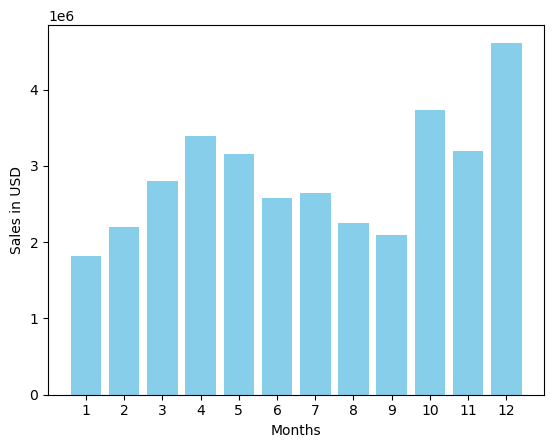

In [114]:
months = range(1,13)
plt.bar(months, best_month['Sales'],color='skyblue')
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales in USD")
plt.show()

#### Finding which US city had the best sales number

    Adding a "City" column

In [121]:
#using apply method to extract the names of the cities
df["City"] = df["Purchase Address"].apply(lambda x: x.split(',')[1])

In [123]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


>*There might be a slight issue since we can have duplicates -State wise- so I'm gonna add the states acronynms to differentiate between similar cities* 

In [138]:
#I'm just going to edit the previous line of code to give us 

df["City"] = df["Purchase Address"].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])

In [139]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [140]:
city_sales = df.groupby("City").sum()
city_sales = city_sales.iloc[:,-1:]

In [141]:
city_sales

,Sales
City,
Atlanta GA,2795498.58
Austin TX,1819581.75
Boston MA,3661642.01
Dallas TX,2767975.40
Los Angeles CA,5452570.80
New York City NY,4664317.43
Portland ME,449758.27
Portland OR,1870732.34
San Francisco CA,8262203.91


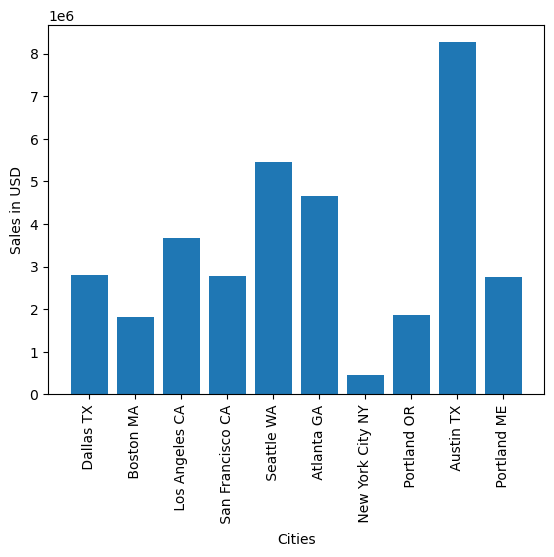

In [145]:
Cities = df["City"].unique()

plt.bar(Cities, city_sales["Sales"])

plt.xticks(rotation='vertical')
plt.xlabel("Cities")
plt.ylabel("Sales in USD")
plt.show()

>*What we have here is not coherant with what we got earlier, to fix this we should match the X-axis with the Y-axis*